In [7]:
!pip install scikit-learn
!pip install nltk

In [6]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import re

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data=pd.read_csv("/content/drive/MyDrive/Dsadata.csv", encoding='utf-8')

In [ ]:
data.head()

,Poet writer,Poet Name
0,سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں ; سو اس ...,احمد فراز
1,سنا ہے ربط ہے اس کو خراب حالوں سے ; سو اپنے آپ...,احمد فراز
2,سنا ہے درد کی گاہک ہے چشم ناز اس کی ; سو ہم بھ...,احمد فراز
3,سنا ہے اس کو بھی ہے شعر و شاعری سے شغف ; سو ہم...,احمد فراز
4,سنا ہے بولے تو باتوں سے پھول جھڑتے ہیں ; یہ با...,احمد فراز


In [ ]:
data.shape
data.head(3)


,Poet writer,Poet Name
0,سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں ; سو اس ...,احمد فراز
1,سنا ہے ربط ہے اس کو خراب حالوں سے ; سو اپنے آپ...,احمد فراز
2,سنا ہے درد کی گاہک ہے چشم ناز اس کی ; سو ہم بھ...,احمد فراز


In [ ]:
import re
pattern = r'[a-zA-Z0-9;:"(,)]'  # This should be a raw string (r) and use square brackets for character classes
data['Poet writer'] = data['Poet writer'].apply(lambda x: re.sub(pattern, '', x))


In [ ]:
data.head(3)

,Poet writer,Poet Name
0,سنا ہے لوگ اسے آنکھ بھر کے دیکھتے ہیں سو اس ک...,احمد فراز
1,سنا ہے ربط ہے اس کو خراب حالوں سے سو اپنے آپ ...,احمد فراز
2,سنا ہے درد کی گاہک ہے چشم ناز اس کی سو ہم بھی...,احمد فراز


In [ ]:
categories=data['Poet Name'].unique()
for catogory in categories:
  print(catogory)

احمد فراز
علامہ اقبال
فیض احمد فیض
حیدر علی آتش
جون ایلیا
مرزا غالب
مير تقی میر
منیر نیازی
نظیر اکبر آبادی
ندا فاضلی
پروین شاکر
قتیل شفائی
سراج اورنگ آبادی
ریاضؔ خیرآبادی
ظفر اقبال


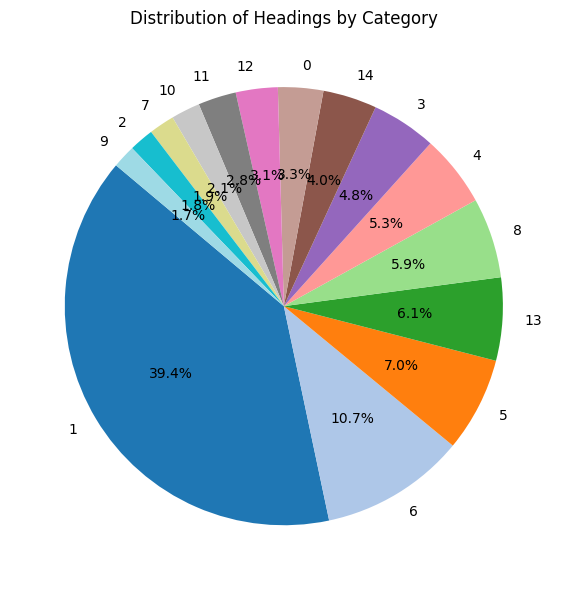

In [24]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'Poet Name' column
category_mappings = {
    'احمد فراز': '0',
    'علامہ اقبال': '1',
    'فیض احمد فیض': '2',
    'حیدر علی آتش': '3',
    'جون ایلیا': '4',
    'مرزا غالب': '5',
    'مير تقی میر': '6',
    'منیر نیازی': '7',
    'نظیر اکبر آبادی': '8',
    'ندا فاضلی': '9',
    'پروین شاکر': '10',
    'قتیل شفائی': '11',
    'سراج اورنگ آبادی': '12',
    'ریاضؔ خیرآبادی': '13',
    'ظفر اقبال': '14'
}

# Replace 'data' with your actual DataFrame and 'Poet Name' with the correct column name
category_counts = data['Poet Name'].map(category_mappings).value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')

# Adding labels
plt.ylabel('')
plt.title('Distribution of Headings by Category')
plt.tight_layout()

plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Poet writer'])
y = data['Poet Name']

In [ ]:
print(X)

  (0, 12602)	0.3178074665808082
  (0, 5303)	0.20575971626444156
  (0, 14830)	0.1624293842211799
  (0, 11244)	0.08537294864336921
  (0, 7958)	0.20945047184863066
  (0, 627)	0.12061349137723404
  (0, 7283)	0.20407783346940467
  (0, 16008)	0.2485640795549199
  (0, 5660)	0.518850405455648
  (0, 15102)	0.31042607215409335
  (0, 2534)	0.24030083768839394
  (0, 270)	0.23342959772226832
  (0, 691)	0.21096576535609687
  (0, 9683)	0.2513257212194013
  (0, 16011)	0.07386373721882232
  (0, 7190)	0.2649708412932626
  (1, 14414)	0.15872174059984784
  (1, 1909)	0.32810381323017235
  (1, 309)	0.2410667732466859
  (1, 1344)	0.20444447450163417
  (1, 7595)	0.10310261114139302
  (1, 4266)	0.4376273335924357
  (1, 4607)	0.3028241987604905
  (1, 14706)	0.24337428907389644
  (1, 5818)	0.3412082802147432
  :	:
  (27752, 1108)	0.4321040124052846
  (27752, 14489)	0.2643937573856805
  (27752, 7684)	0.49080090716014835
  (27752, 15063)	0.14911607604782082
  (27752, 7595)	0.13458077327319934
  (27752, 15102)	0.14

In [29]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Poet writer'])
y = data['Poet Name']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(x_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


                  precision    recall  f1-score   support

       احمد فراز       0.18      0.18      0.18       170
       جون ایلیا       0.20      0.20      0.20       289
    حیدر علی آتش       0.19      0.17      0.18       281
  ریاضؔ خیرآبادی       0.23      0.22      0.22       344
سراج اورنگ آبادی       0.60      0.50      0.54       207
       ظفر اقبال       0.22      0.24      0.23       202
     علامہ اقبال       0.81      0.87      0.84      2156
    فیض احمد فیض       0.09      0.06      0.07        94
      قتیل شفائی       0.15      0.12      0.14       153
       مرزا غالب       0.32      0.32      0.32       402
      منیر نیازی       0.20      0.14      0.16       116
     مير تقی میر       0.30      0.30      0.30       590
       ندا فاضلی       0.19      0.13      0.16        98
 نظیر اکبر آبادی       0.33      0.37      0.35       326
      پروین شاکر       0.11      0.08      0.09       123

        accuracy                           0.49      5551
       macro